In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [52]:
def parse_blocks_file(file_path):
    blocks = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                parts = line.split()
                if parts[0]=="VSS":
                    break
                if len(parts) >= 5:
                    block_name = parts[0]
                    x = int(parts[1])
                    y = int(parts[2])

                    # Extract width and height from the string, removing parentheses
                    part1 = parts[5].replace(',', '').replace('(', '')
                    part2 = parts[6].replace('(', '').replace(')', '')
                    width = int(part1)
                    height = int(part2)

                    direction = parts[6] if len(parts) >= 7 else None

                    blocks[block_name] = {'x': x, 'y': y, 'width': width, 'height': height, 'direction': direction}

    return blocks

In [59]:
def generate_image(blocks):
    fig, ax = plt.subplots()

    for block, properties in blocks.items():
        x = properties['x']
        y = properties['y']
        width = properties['width']
        height = properties['height']
        direction = properties['direction']

        print(x,y,width,height)
        # Adjust width and height based on the direction
        if direction in ['W', 'E', 'FE', 'FW']:
            width, height = height, width

        rect = patches.Rectangle((x, y), width, height, fill=True, edgecolor='black')
        ax.add_patch(rect)

        # Add text indicating the direction
#         if direction:
#             ax.text(x + width / 2, y + height / 2, direction, ha='center', va='center', color='white')

    ax.set_xlim(-100, 1500)  # Adjust the axis limits as needed
    ax.set_ylim(-100, 1500)
    ax.set_aspect('equal', 'box')
    #plt.gca().invert_yaxis()  # Invert y-axis to match typical coordinate systems
    plt.show()

700 469 336 133
119 504 119 378
238 742 161 140
357 959 119 49
1043 336 175 119
266 469 406 140
343 0 497 140
161 889 196 119
0 231 119 294
0 889 161 119
917 742 119 266
945 0 119 336
917 602 119 126
441 154 371 182
399 735 203 182
1036 455 182 203
861 21 84 119
133 210 133 294
1036 658 182 350
602 735 315 140
602 875 315 133
476 336 560 133
266 329 133 140
812 161 133 175
0 0 133 231
1085 21 133 315
343 140 98 182
133 0 210 210
539 609 378 126
357 609 182 119
238 609 119 119
0 525 119 357
483 924 119 84


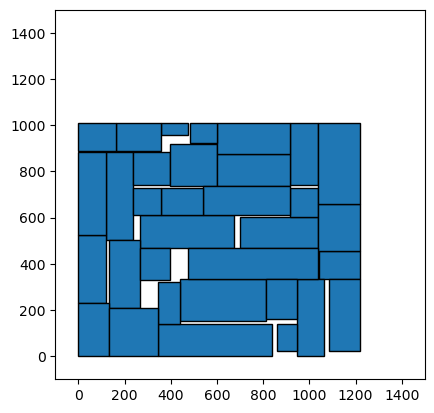

In [65]:
file_path = "Dataset/out4/out4.pl"  # Replace with the actual path to your file
blocks = parse_blocks_file(file_path)
generate_image(blocks)

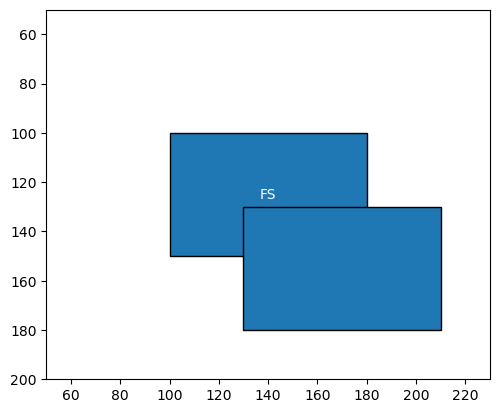

In [66]:
def plot_single_block(x, y, width, height, direction=None):
    fig, ax = plt.subplots()  # Adjust the figure size as needed

    # Adjust width and height based on the direction
    if direction in ('FS', 'BS'):
        width, height = height, width

    rect = patches.Rectangle((x, y), width, height, fill=True, edgecolor='black')
    ax.add_patch(rect)
    
    rect = patches.Rectangle((x+30, y+30), width, height, fill=True, edgecolor='black')
    ax.add_patch(rect)

    # Add text indicating the direction
    if direction:
        ax.text(x + width / 2, y + height / 2, direction, ha='center', va='center', color='white')

    ax.set_aspect('equal', 'box')
    ax.set_xlim(x - 50, x + width + 50)  # Adjust the axis limits as needed
    ax.set_ylim(y - 50, y + height + 50)
    plt.gca().invert_yaxis()  # Invert y-axis to match typical coordinate systems
    plt.show()

# Example: Plot a single block
plot_single_block(x=100, y=100, width=50, height=80, direction='FS')